<a href="https://colab.research.google.com/github/karin-kaito/FWI_202506/blob/main/OpenFWI_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenFWI Hands-on Tutorial
![Status](https://img.shields.io/static/v1.svg?label=Status&message=finished&color=green)

**GitHub OpenFWI code**: [![View files on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/lanl/OpenFWI)

**Tutorial Data**: [![GoogleDrive](https://img.shields.io/static/v1.svg?logo=google-drive&logoColor=yellow&label=GDrive&message=Download&color=yellow)](https://drive.google.com/drive/folders/1u4pFvu7UnQozu-tLyyPdsQjRmAZ-kGil?usp=sharing)  

**Pre-trained Model**:[![GoogleDrive](https://img.shields.io/static/v1.svg?logo=google-drive&logoColor=yellow&label=GDrive&message=Download&color=yellow)](https://drive.google.com/drive/u/2/folders/1XlJNYsLDslrcle4YWzG4gIW5ogrK8qLE)   

**OpenFWI Website**: [![Website](https://img.shields.io/website?up_color=red&up_message=OpenFWI%20Website&url=https%3A%2F%2Fopenfwi-lanl.github.io%2F)](https://openfwi-lanl.github.io)

**Google Group**: [![Website](https://img.shields.io/website?up_color=red&up_message=Google%20Group&url=https%3A%2F%2Fgroups.google.com/g/openfwi%2F)](https://groups.google.com/g/openfwi)

**Authors**: Shihang Feng, Chengyuan Deng

**Email**: shihang.feng@live.com

<br>


This tutorial provides a beginner-friendly introduction regarding the training and testing an InversionNet model with FlatVel-A Dataset.

In addition, we show how to visualize the seismic data and velocity maps.

Here we use a small dataset sampled from the original FlatVel-A dataset, for the complete OpenFWI datasets, codes, and other information, refer to [our website](https://openfwi-lanl.github.io)

---
##1. Download the Codes
Download the code package on GitHub and go to the code directory.

In [ ]:
!git clone https://github.com/lanl/OpenFWI
%cd ./OpenFWI

Cloning into 'OpenFWI'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 107 (delta 64), reused 71 (delta 35), pack-reused 0 (from 0)
Receiving objects: 100% (107/107), 44.38 KiB | 3.70 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/OpenFWI


---
##2. Background: Seismic Survey

Acoustic Wave Equation:
 $$\nabla^2p(x,z,t)-\frac{1}{c(x,z)^2}\frac{\partial ^2p(x,z,t)}{\partial t ^2}=s
$$

<p align='center'> $s-$Seismic source $ \ \ \ \ $ $c-$Velocity Map $  \ \ \ \ $$p-$Seismic wavefield</p>

<br>

Seismic source $s$, such as thumper truck, explosive, air guns and so on, generates the seismic wave, which travel through the subsurface medium such as layer of rocks or water. In this tutorial, we assume the source function is known.

Velocity map $c$ describes the speed with which the wave propagates through the medium.

Seismic wavefield $p$ provides the information of seismic wave propagtion in the subsurface.

<br>
We need to know the seismic wavefield $p$ to invert for velocity map $c$. But it is very expensive to put the sensors beneath the ground surface. Instead  we put the geophones on the surface to record the wave motion on the surface as seismic data $p(x=g,z=0,t)$, where $g$ is the location of geophones on the surface.

<p align='center'>Inversion problem: $p(g,t)$→$c(x,z)$</p>



<img src=https://www.scisnack.com/wp-content/uploads/2019/10/seismic.jpg width="800">

*An example of seismic exploration. Image source: Energy Information Australia.*

---
## 3. Download the Tutorial Data
FlatVel-A Dataset for this tutorial is at
[![GoogleDrive](https://img.shields.io/static/v1.svg?logo=google-drive&logoColor=yellow&label=GDrive&message=Download&color=yellow)](https://drive.google.com/drive/folders/1u4pFvu7UnQozu-tLyyPdsQjRmAZ-kGil?usp=sharing)
<br>
<br>
<p align='left'>Data: Seismic data $p(g,t)$ $\ \ \ \ $ Label: Velocity Map $c(x,z)$</p>
<br>
There are three pairs of data and label:

*fva_velocity1.npy* and *fva_data1.npy*

*fva_velocity2.npy* and *fva_data2.npy*

*fva_velocity3.npy* and *fva_data3.npy*

In [ ]:
! wget https://zenodo.org/record/7293894/files/fva_velocity1.npy?download=1 -O fva_velocity1.npy
! wget https://zenodo.org/record/7293894/files/fva_velocity2.npy?download=1 -O fva_velocity2.npy
! wget https://zenodo.org/record/7293894/files/fva_velocity3.npy?download=1 -O fva_velocity3.npy


! wget https://zenodo.org/record/7293894/files/fva_data1.npy?download=1 -O fva_data1.npy
! wget https://zenodo.org/record/7293894/files/fva_data2.npy?download=1 -O fva_data2.npy
! wget https://zenodo.org/record/7293894/files/fva_data3.npy?download=1 -O fva_data3.npy

--2025-06-08 04:16:46--  https://zenodo.org/record/7293894/files/fva_velocity1.npy?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/7293894/files/fva_velocity1.npy [following]
--2025-06-08 04:16:46--  https://zenodo.org/records/7293894/files/fva_velocity1.npy
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 2352128 (2.2M) [application/octet-stream]
Saving to: ‘fva_velocity1.npy’

fva_velocity1.npy   100%[===================>]   2.24M  8.52MB/s    in 0.3s    

2025-06-08 04:16:47 (8.52 MB/s) - ‘fva_velocity1.npy’ saved [2352128/2352128]

--2025-06-08 04:16:47--  https://zenodo.org/record/7293894/files/fva_velocity2.npy?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.o

---
##4. Data and Label Visualization

Load data and label for visualization


In [ ]:
import numpy as np
velocity = np.load('fva_velocity2.npy')
data = np.load('fva_data2.npy')

Check the size of the velocity map and seismic data



In [ ]:
print('Velocity map size:', velocity.shape)
print('Seismic data size:', data.shape)


Velocity map size: (120, 1, 70, 70)
Seismic data size: (120, 5, 1000, 70)


###Velocity Map Vistualization

Each file contains 120 samples.

Velocity Map $c(x,z)$:

$nx=70$, $nz=70$

$dx=10\ m$, $dz=10\ m$

In [ ]:
import matplotlib.pyplot as plt
## Select a sample in the data
sample=14

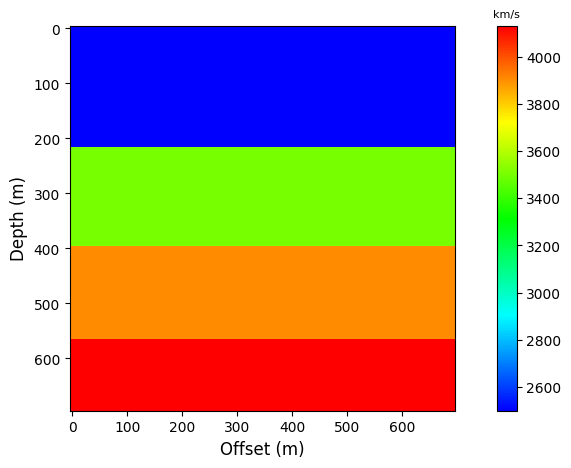

In [ ]:
from matplotlib.colors import ListedColormap
rainbow_cmap = ListedColormap(np.load('rainbow256.npy'))
fig, ax = plt.subplots(1, 1, figsize=(11, 5))
img=ax.imshow(velocity[sample,0,:,:],cmap=rainbow_cmap)
ax.set_xticks(range(0, 70, 10))
ax.set_xticklabels(range(0, 700, 100))
ax.set_yticks(range(0, 70, 10))
ax.set_yticklabels(range(0, 700, 100))
ax.set_ylabel('Depth (m)', fontsize=12)
ax.set_xlabel('Offset (m)', fontsize=12)
clb=plt.colorbar(img, ax=ax)
clb.ax.set_title('km/s',fontsize=8)
plt.show()

In the real world, the flat rock layers look like this:

<left width="100%" style="padding:10px"><img src="http://2.bp.blogspot.com/-S0ztekHkBEY/Vh7DzDlMgAI/AAAAAAAACM4/AQ6BU8pcxnU/s1600/rock-layers-3578_640.jpg" width="400px"></left>

*An example of rock layers. Image source: http://geologylearn.blogspot.com/*


###Wave Propagation in the Velocity Map

We put surface sources at 5 different location and generate 5 different seismic data.

Let see an example about how the waves progagate in the velocity map.



In [ ]:
! wget --no-check-certificate 'https://zenodo.org/record/7293942/files/tutorial_wave.mp4?download=1'  -O wave_propagation.mp4

from IPython.display import HTML
from base64 import b64encode
mp4 = open('wave_propagation.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1200 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

--2025-06-08 04:17:22--  https://zenodo.org/record/7293942/files/tutorial_wave.mp4?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/7293942/files/tutorial_wave.mp4 [following]
--2025-06-08 04:17:22--  https://zenodo.org/records/7293942/files/tutorial_wave.mp4
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1071801 (1.0M) [application/octet-stream]
Saving to: ‘wave_propagation.mp4’

wave_propagation.mp 100%[===================>]   1.02M  3.45MB/s    in 0.3s    

2025-06-08 04:17:23 (3.45 MB/s) - ‘wave_propagation.mp4’ saved [1071801/1071801]



Direct Wave Traveltime:

 $$t_{direct}=\frac{d}{c}
$$

Reflection Wave Traveltime:
 $$t_{refl}=\frac{\sqrt{d^2+4h^2}}{c}
$$

<center width="100%" style="padding:10px"><img src="https://openfwi-lanl.github.io/assets/img/tutorial_path.png" width="400px"></center>

###Seismic Data Vistualization

Seismic Data $p(g,t)$:

$nt=1000$, $ng=70$

$dt=0.001\ s$, $dg=10\ m$

Seismic data size: (120, 5, 1000, 70)


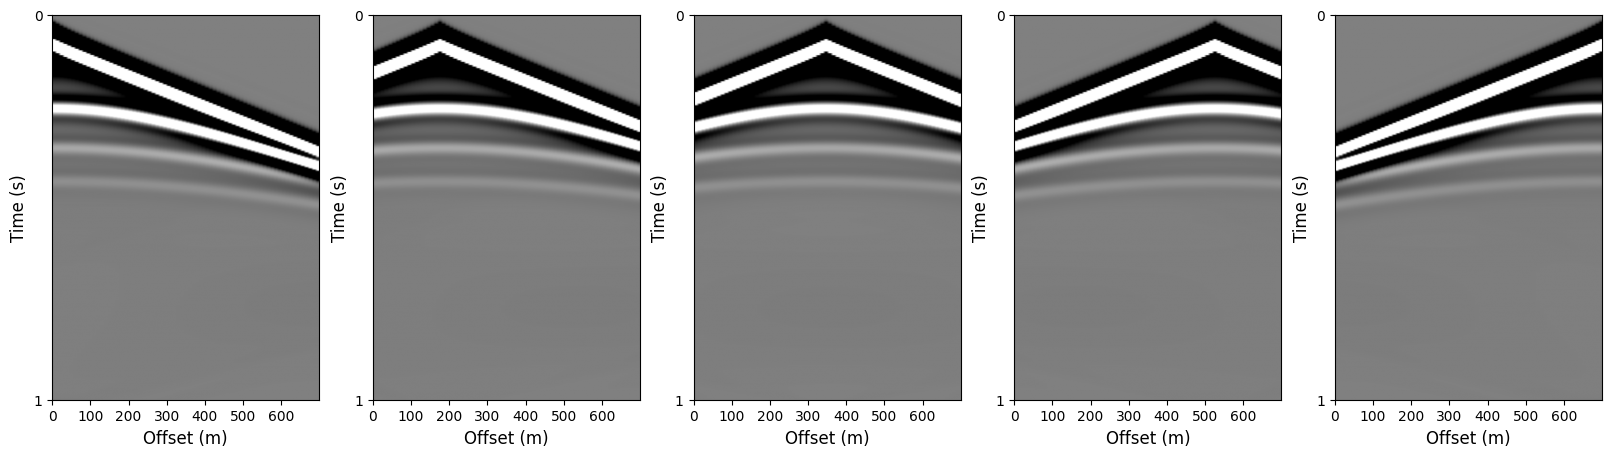

In [ ]:
print('Seismic data size:', data.shape)

fig,ax=plt.subplots(1,5,figsize=(20,5))
ax[0].imshow(data[sample,0,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[1].imshow(data[sample,1,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[2].imshow(data[sample,2,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[3].imshow(data[sample,3,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[4].imshow(data[sample,4,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
for axis in ax:
   axis.set_xticks(range(0, 70, 10))
   axis.set_xticklabels(range(0, 700, 100))
   axis.set_yticks(range(0, 2000, 1000))
   axis.set_yticklabels(range(0, 2,1))
   axis.set_ylabel('Time (s)', fontsize=12)
   axis.set_xlabel('Offset (m)', fontsize=12)
plt.show()


---
##5. Inversion Network
<p align='center'>Inversion problem: $p(g,t)$→$c(x,z)$</p>

In this tutorial, we use InversionNet ([Wu and Lin, 2019](https://ieeexplore.ieee.org/abstract/document/8918045)):

The network structure (see *network.py*)

<center width="100%" style="padding:10px"><img src="https://openfwi-lanl.github.io/assets/img/InversionNet.png" width="1600px"></center>


The network is mainly composed of 2D convolution layers and transposed 2D convolution layers.

<left width="100%" style="padding:10px"><img src="https://editor.analyticsvidhya.com/uploads/33383str.jpg" width="600px"></left>

*2D convolution with no padding, stride of 2 and kernel of 3. Image source: https://www.analyticsvidhya.com/blog/2022/03/basics-of-cnn-in-deep-learning/


<left width="100%" style="padding:10px"><img src="https://miro.medium.com/max/790/1*Lpn4nag_KRMfGkx1k6bV-g.gif" width="300px"></left>

*Transposed 2D convolution with no padding, stride of 2 and kernel of 3.Image source: https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d


###Training
**Main file**: *train.py*

**Dataset related**:

* "*-ds flat-tutorial*"$-$ Dataset name, such as shape, spacing, maximum and minimum value (listed in dataset_config.json).

**Path related**:

* "*-n tutorial*"$-$ Folder name for this experiment

* "*-t tutorial_train.txt*"$-$ The directory of training set. *fva_velocity1.npy*, *fva_data1.npy*, *fva_velocity2.npy* and *fva_data2.npy* are the training set.


* "*-v tutorial_val.txt*"$-$ The directory of validation set. *fva_velocity3.npy* and *fva_data3.npy* are the validation set.

**Model related**:

* "*-m InversionNet*"$-$ Network name (refers to *network.py*).


**Training related**:

* *-g1v 1*$-$ $\ell_1$ loss function weight

* *-g2v 0*$-$ $\ell_2$ loss function weight


* "*--lr 0.0001*"$-$ Learning rate

* "*-b 120*"$-$ Batch size

* "*-eb 10*"$-$ Epochs in a saved model. Save the best model every 10 epochs.

* "*-nb 5*"$-$ Number of saved model. Save 4 models means total epochs number is $10\times5=50$

**Tensorboard related**:

* "*--tensorboard*"$-$ Use tensorboard for logging.


(More details about input parameters in *train.py*)

In [ ]:
!python train.py -ds flatvel-tutorial -n tutorial -m InversionNet -g1v 1 -g2v 0  --tensorboard -t tutorial_train.txt -v tutorial_val.txt  --lr 0.0001 -b 120 -eb 10 -nb 5

2025-06-08 04:17:54.174349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749356274.194077    1450 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749356274.200236    1450 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-08 04:17:54.220093: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Namespace(device='cuda', dataset='flatvel-tutorial', file_size=None, anno_path='split_files', train_anno='split_files

### Testing

**Main file**: *test.py*

**Dataset related**:

* "*-ds flat-tutorial*"$-$ Dataset Name, such as shape, spacing, maximum and minimum value (listed in dataset_config.json).

**Path related**:

* "*-n tutorial*"$-$ Folder name for this experiment

* "*-t tutorial_train.txt*"$-$ The directory of dataset you want to test.

**Model related**:

* "*-m InversionNet*"$-$ Network name (refers to *network.py*).

* "*-r checkpoint.pth"$-$ Load saved network parameters (default is checkpoint.pth).

**Visualization related**:

* "*--vis*"$-$ Visualization option.

* "*-vb 2*"$-$ Number of batch to be visualized.

* "*-vsa 3*"$-$ Number of samples in a batch to be visualized.

(More details about input parameters in *test.py*)
<br>
### Test on Training Set


Check how the trained network perfom on the training data, we set "-v tutorial_train.txt"

To test the network's performance on training set *fva_velocity1.npy*, *fva_data1.npy*, *fva_velocity2.npy* and *fva_data2.npy*



Namespace(device='cuda', dataset='flatvel-tutorial', file_size=None, anno_path='split_files', val_anno='split_files/tutorial_train.txt', output_path='Invnet_models/tutorial/', save_name='tutorial', suffix=None, model='InversionNet', norm='bn', up_mode=None, sample_spatial=1.0, sample_temporal=1, batch_size=50, workers=16, k=1, resume='Invnet_models/tutorial/checkpoint.pth', vis=True, vis_suffix=None, vis_batch=2, vis_sample=3, missing=0, std=0)
torch version:  2.6.0+cu124
torchvision version:  0.21.0+cu124
Loading data
Loading validation data
Creating data loaders
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if n

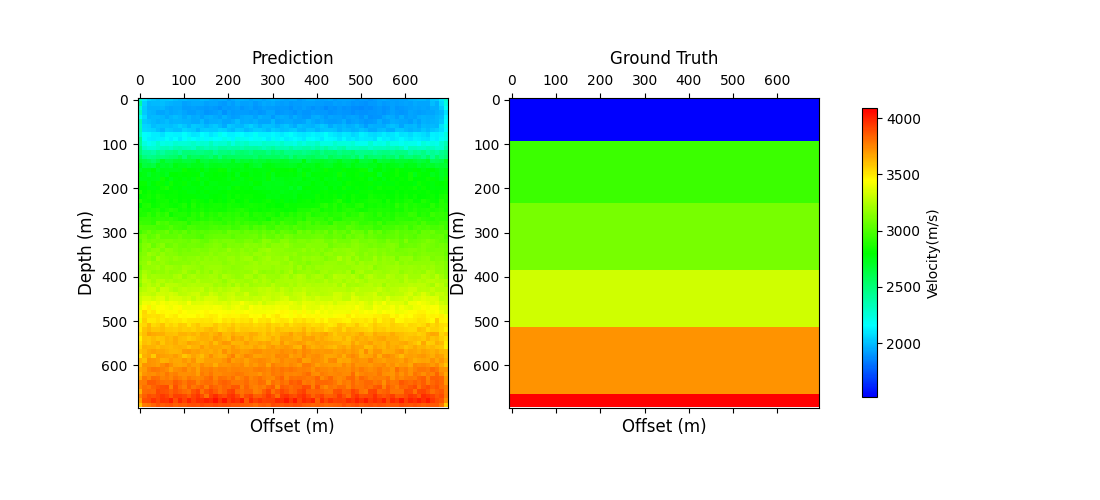

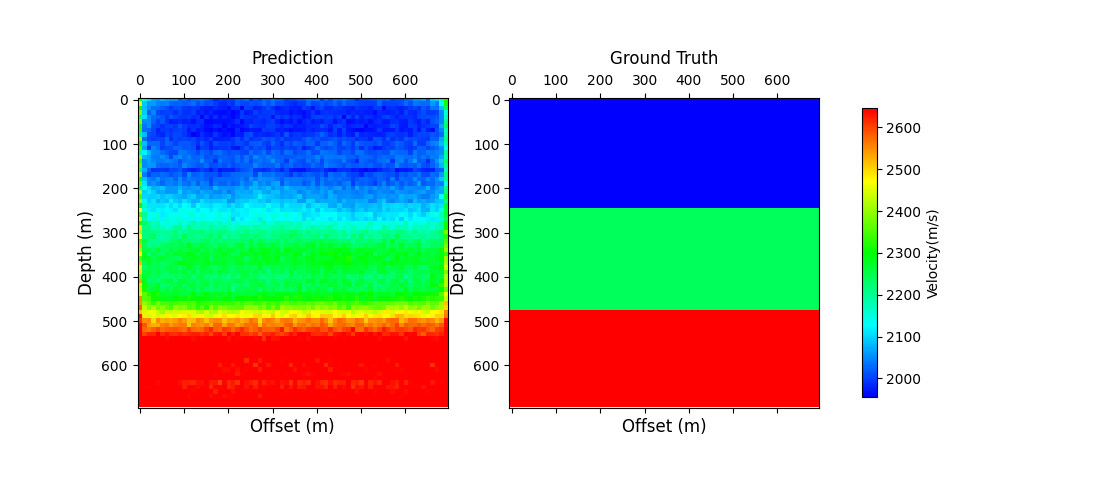

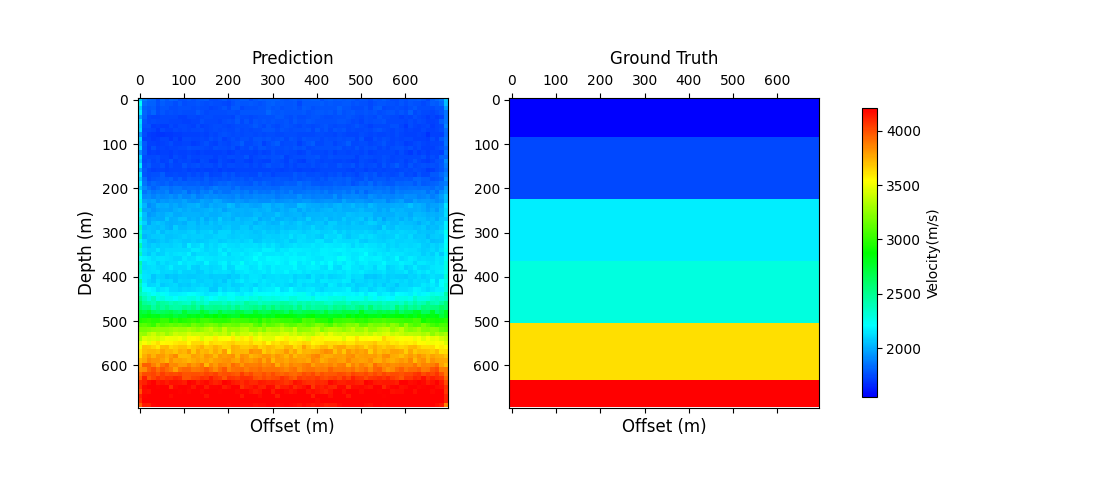

In [ ]:
!python test.py -ds flatvel-tutorial -n tutorial -m InversionNet -v tutorial_train.txt -r checkpoint.pth --vis -vb 2 -vsa 3

from IPython.display import Image
from IPython.display import display
a=Image('./Invnet_models/tutorial/visualization/V_0_0.png', width = 600, height = 300)
b=Image('./Invnet_models/tutorial/visualization/V_0_1.png', width = 600, height = 300)
c=Image('./Invnet_models/tutorial/visualization/V_0_2.png', width = 600, height = 300)
display(a,b,c)

###Loss

$\ell_1$ loss: $\ MAE(x,y)=\frac{\sum_{i=1}^n|y_i-x_i|}{n}$


$\ell_2$ loss:   $\ MSE(x,y)=\frac{\sum_{i=1}^n(y_i-x_i)^2}{n}$




Structural Similarity Index Measure (SSIM): $\ SSIM(x,y)=\frac{(2\mu_x\mu_y+c_1)(2\delta_{xy}+c_2)}{(\mu_x^2+\mu_y^2+c_1)(\delta_x^2+\delta_y^2+c_2)}$

$\mu_x-$ the pixel sample mean of x

$\mu_y-$ the pixel sample mean of y

$\delta_x^2-$ the variance of x

$\delta_y^2-$ the variance of y

$\delta_{xy}-$ the covariance of x and y

$c_1,c_2-$ two variables to stabilize the division with weak denominator

### Test on Validation Set
Check how the trained network perfom on the validation data, we set "-v tutorial_val.txt"

To test the network's performance on validation set *fva_velocity3.npy* and *fva_data3.npy*.

Namespace(device='cuda', dataset='flatvel-tutorial', file_size=None, anno_path='split_files', val_anno='split_files/tutorial_val.txt', output_path='Invnet_models/tutorial/', save_name='tutorial', suffix=None, model='InversionNet', norm='bn', up_mode=None, sample_spatial=1.0, sample_temporal=1, batch_size=50, workers=16, k=1, resume='Invnet_models/tutorial/checkpoint.pth', vis=True, vis_suffix=None, vis_batch=2, vis_sample=3, missing=0, std=0)
torch version:  2.6.0+cu124
torchvision version:  0.21.0+cu124
Loading data
Loading validation data
Creating data loaders
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if nec

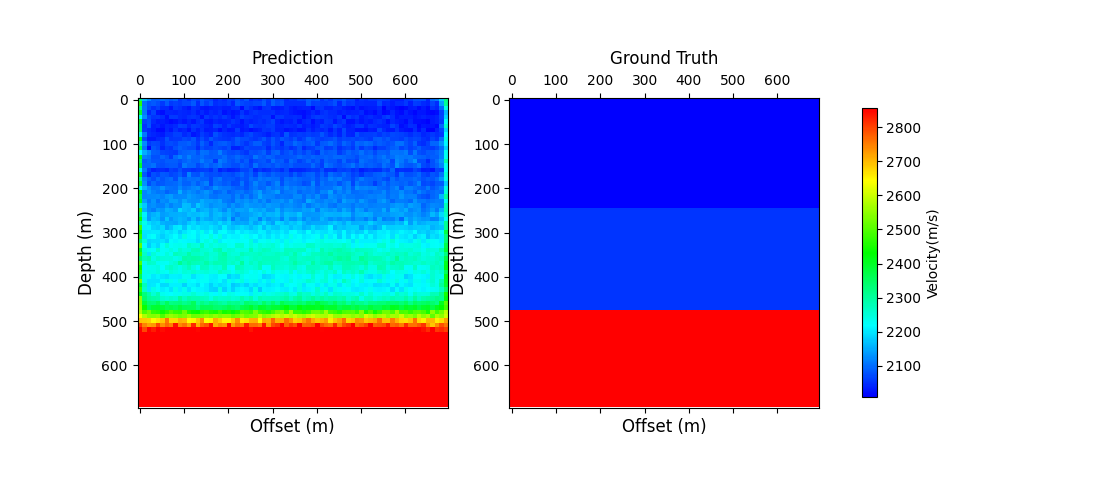

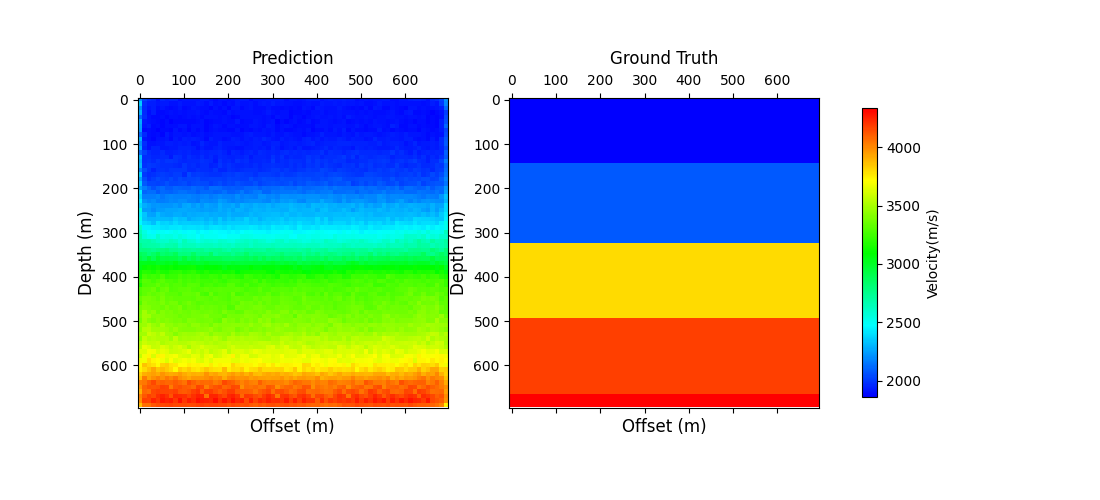

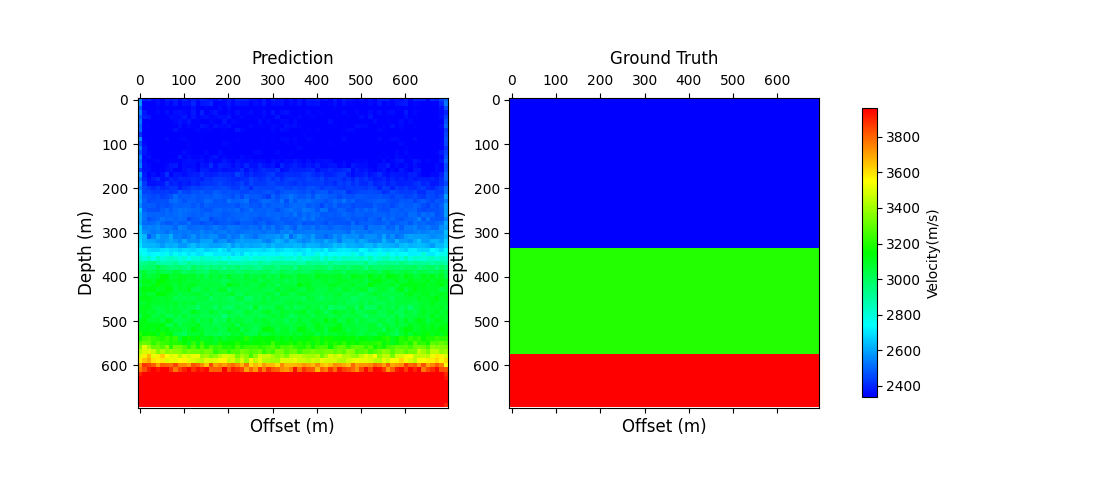

In [ ]:
!python test.py -ds flatvel-tutorial -n tutorial -m InversionNet -v tutorial_val.txt -r checkpoint.pth --vis -vb 2 -vsa 3
# !python test.py -ds flatvel-tutorial -n tutorial -m InversionNet -v tutorial_val.txt -r checkpoint.pth --vis -vb 2 -vsa 3
a=Image('./Invnet_models/tutorial/visualization/V_0_0.png', width = 600, height = 300)
b=Image('./Invnet_models/tutorial/visualization/V_0_1.png', width = 600, height = 300)
c=Image('./Invnet_models/tutorial/visualization/V_0_2.png', width = 600, height = 300)
display(a,b,c)



### Download Pre-trained Model
The pre-trained models are available at [![GoogleDrive](https://img.shields.io/static/v1.svg?logo=google-drive&logoColor=yellow&label=GDrive&message=Download&color=yellow)](https://drive.google.com/drive/u/2/folders/1XlJNYsLDslrcle4YWzG4gIW5ogrK8qLE). Here we download *fva_l1.pth*

*fva_l1.pth* is trained with full FlatVel_A dataset 24,000 training samples and 6,000 validataion samples. (**Full Data**:![Website](https://img.shields.io/website?up_color=red&up_message=OpenFWI%20dataset&url=https%3A%2F%2Fopenfwi-lanl.github.io%2Fdocs%2Fdata.html))

Here we download *fva_l1.pth*, which is the InversionNet model trained on FlatVel-A dataset with *l1* loss.




In [ ]:
! mkdir Invnet_models/pretrained_model/
! wget --no-check-certificate 'https://zenodo.org/record/7293942/files/fva_l1.pth?download=1'   -O ./Invnet_models/pretrained_model/fva_l1.pth

--2025-06-08 04:24:36--  https://zenodo.org/record/7293942/files/fva_l1.pth?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/7293942/files/fva_l1.pth [following]
--2025-06-08 04:24:36--  https://zenodo.org/records/7293942/files/fva_l1.pth
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 293073566 (279M) [application/octet-stream]
Saving to: ‘./Invnet_models/pretrained_model/fva_l1.pth’

./Invnet_models/pre 100%[===================>] 279.50M   111MB/s    in 2.5s    

2025-06-08 04:24:39 (111 MB/s) - ‘./Invnet_models/pretrained_model/fva_l1.pth’ saved [293073566/293073566]



###Test with Pre-trained Model

* "*-r fva_l1.pth"$-$ Load pre-trained Model fva_l1.pth


Namespace(device='cuda', dataset='flatvel-tutorial', file_size=None, anno_path='split_files', val_anno='split_files/tutorial_val.txt', output_path='Invnet_models/pretrained_model/', save_name='pretrained_model', suffix=None, model='InversionNet', norm='bn', up_mode=None, sample_spatial=1.0, sample_temporal=1, batch_size=50, workers=16, k=1, resume='Invnet_models/pretrained_model/fva_l1.pth', vis=True, vis_suffix=None, vis_batch=2, vis_sample=3, missing=0, std=0)
torch version:  2.6.0+cu124
torchvision version:  0.21.0+cu124
Loading data
Loading validation data
Creating data loaders
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential sl

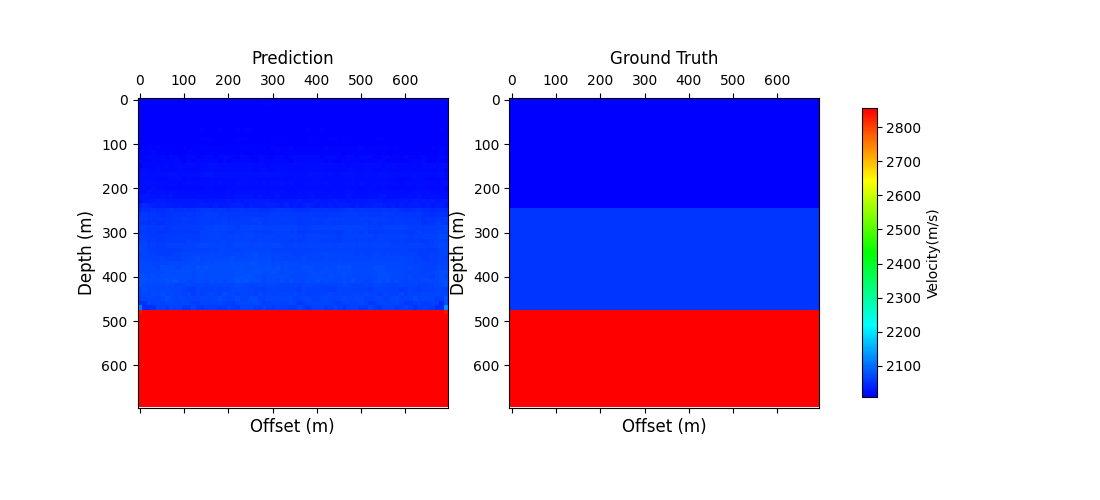

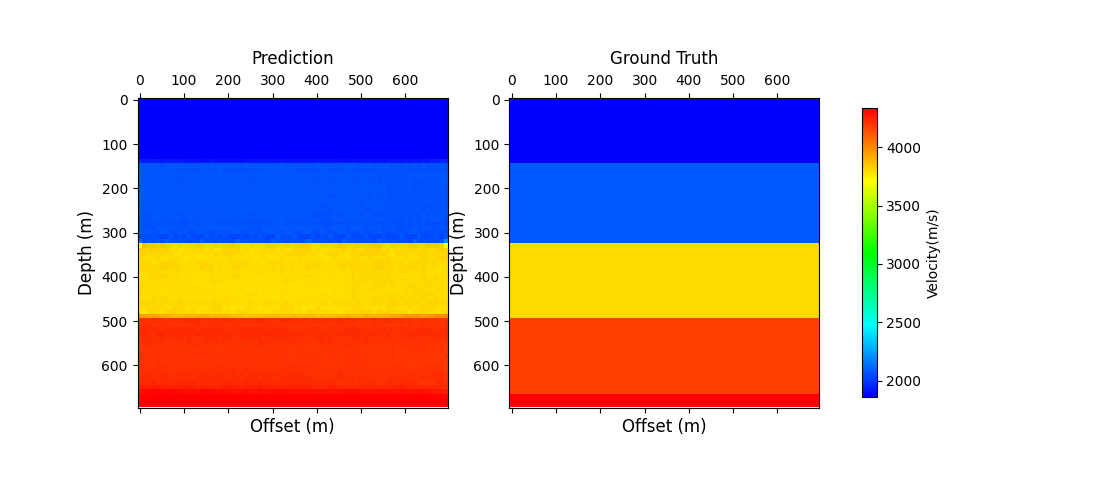

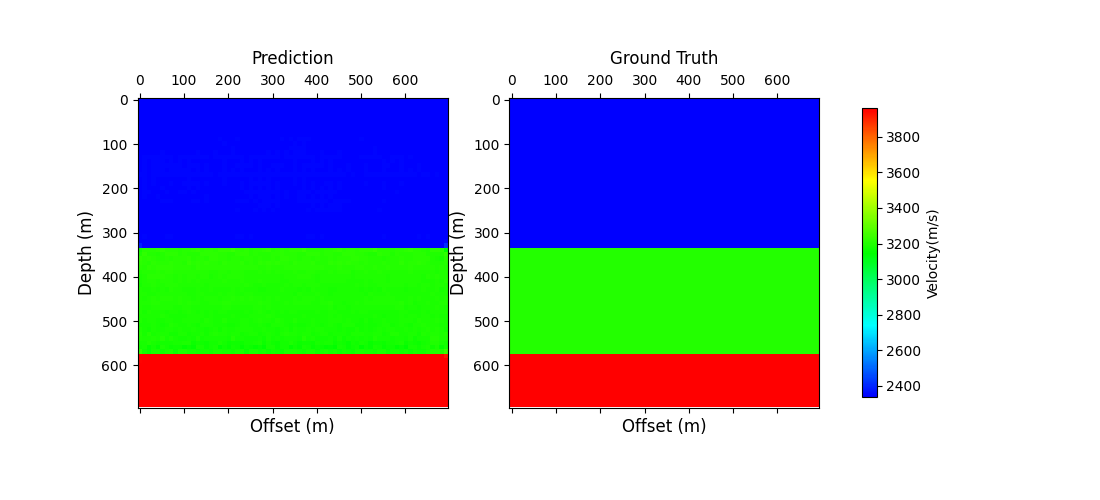

In [ ]:
!python test.py -ds flatvel-tutorial -n pretrained_model -m InversionNet -v tutorial_val.txt -r fva_l1.pth --vis -vb 2 -vsa 3
a=Image('./Invnet_models/pretrained_model/visualization/V_0_0.png', width = 600, height = 300)
b=Image('./Invnet_models/pretrained_model/visualization/V_0_1.png', width = 600, height = 300)
c=Image('./Invnet_models/pretrained_model/visualization/V_0_2.png', width = 600, height = 300)
display(a,b,c)

##Transfer Learning
The pre-trained models are available at [![GoogleDrive](https://img.shields.io/static/v1.svg?logo=google-drive&logoColor=yellow&label=GDrive&message=Download&color=yellow)](https://drive.google.com/drive/u/2/folders/1XlJNYsLDslrcle4YWzG4gIW5ogrK8qLE). Here we download *fva_l1.pth*

*cva_l1.pth* is trained with full CurveVel_A dataset 24,000 training samples and 6,000 validataion samples.

An example of CurveVel_A velocity map:

<left width="100%" style="padding:10px"><img src="https://openfwi-lanl.github.io/assets/img/tutorial_curve.png" width="200px"></left>

In the real world, the curved rock layers look like this:

<left width="100%" style="padding:10px"><img src="https://i0.wp.com/canyonministries.com.s3.amazonaws.com/wp-content/uploads/2015/12/Israel-Fold.jpg" width="400px"></left>

*An example of bent rock layers. Image source: https://www.canyonministries.org/bent-rock-layers/



In [ ]:
!mkdir Invnet_models/transfer_learning/
! wget --no-check-certificate 'https://zenodo.org/record/7293942/files/cva_l1.pth?download=1'   -O ./Invnet_models/transfer_learning/cva_l1.pth

mkdir: cannot create directory ‘Invnet_models/transfer_learning/’: File exists
--2025-06-08 04:49:25--  https://zenodo.org/record/7293942/files/cva_l1.pth?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.43.25, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/7293942/files/cva_l1.pth [following]
--2025-06-08 04:49:25--  https://zenodo.org/records/7293942/files/cva_l1.pth
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 293073566 (279M) [application/octet-stream]
Saving to: ‘./Invnet_models/transfer_learning/cva_l1.pth’

./Invnet_models/tra 100%[===================>] 279.50M  11.4MB/s    in 6.5s    

2025-06-08 04:49:32 (42.7 MB/s) - ‘./Invnet_models/transfer_learning/cva_l1.pth’ saved [293073566/293073566]



Namespace(device='cuda', dataset='flatvel-tutorial', file_size=None, anno_path='split_files', val_anno='split_files/tutorial_val.txt', output_path='Invnet_models/transfer_learning/', save_name='transfer_learning', suffix=None, model='InversionNet', norm='bn', up_mode=None, sample_spatial=1.0, sample_temporal=1, batch_size=50, workers=16, k=1, resume='Invnet_models/transfer_learning/cva_l1.pth', vis=True, vis_suffix=None, vis_batch=2, vis_sample=3, missing=0, std=0)
torch version:  2.6.0+cu124
torchvision version:  0.21.0+cu124
Loading data
Loading validation data
Creating data loaders
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential

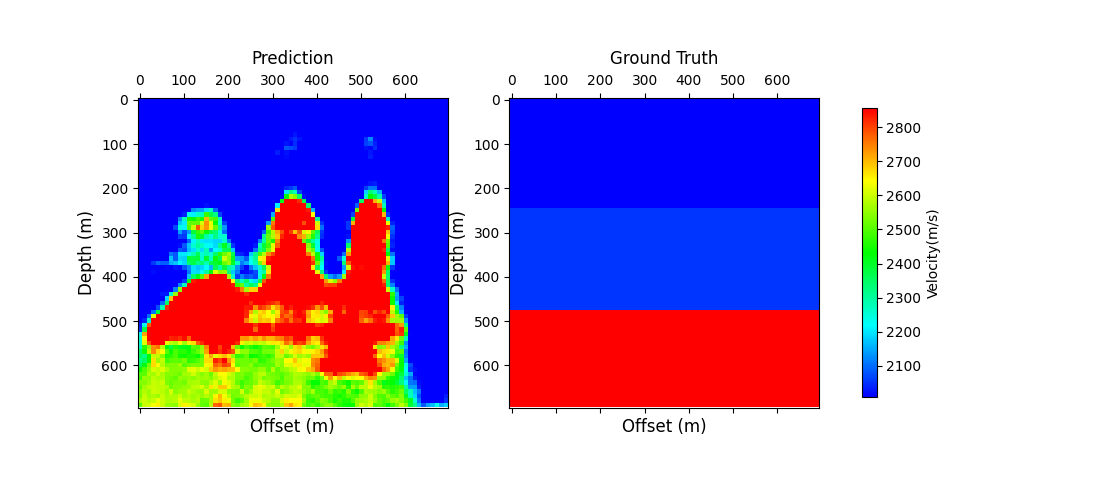

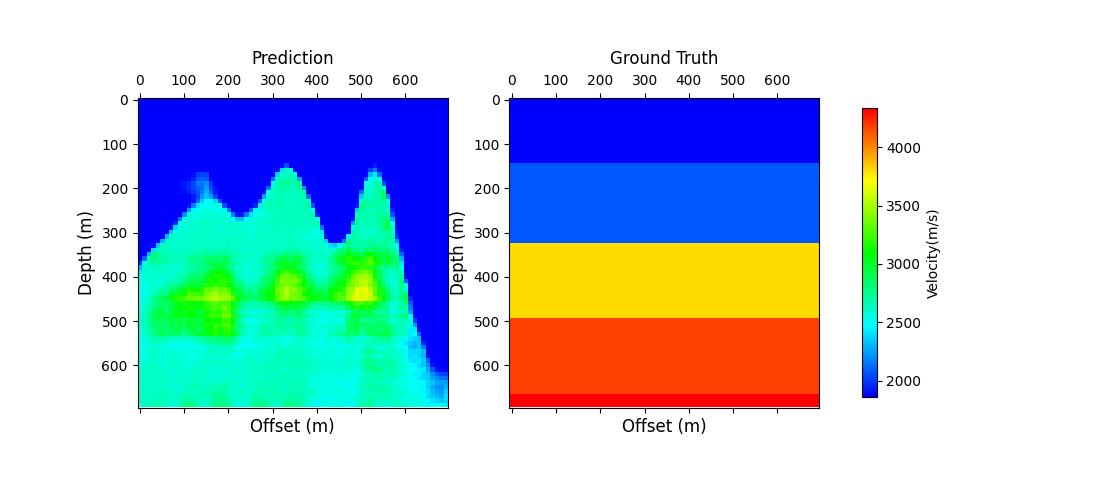

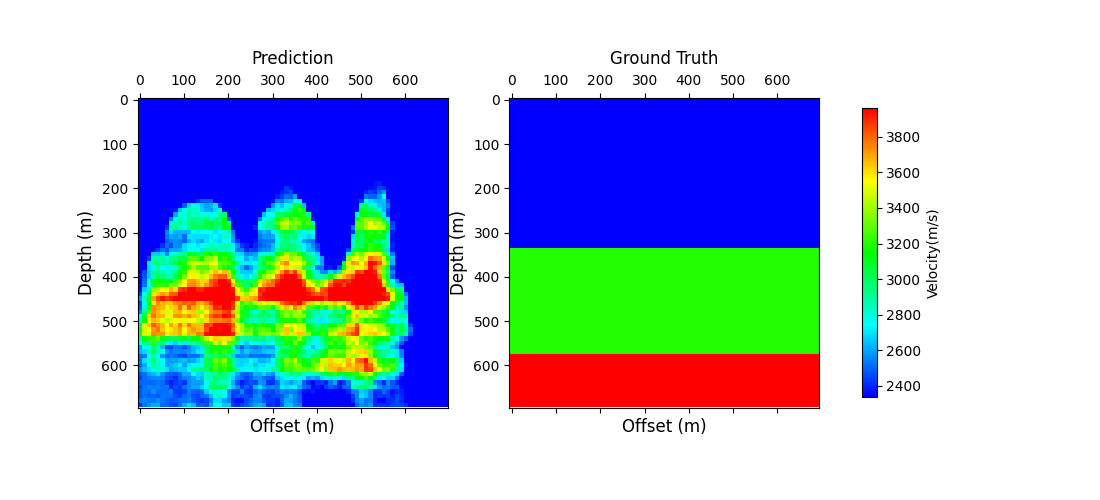

In [ ]:
!python test.py -ds flatvel-tutorial -n transfer_learning -m InversionNet -v tutorial_val.txt -r cva_l1.pth --vis -vb 2 -vsa 3

from IPython.display import Image
from IPython.display import display
a=Image('./Invnet_models/transfer_learning/visualization/V_0_0.png', width = 600, height = 300)
b=Image('./Invnet_models/transfer_learning/visualization/V_0_1.png', width = 600, height = 300)
c=Image('./Invnet_models/transfer_learning/visualization/V_0_2.png', width = 600, height = 300)
display(a,b,c)

Resume training with pre-trained Model cva_l1.pth

* "*-r cva_l1.pth"$-$ Resume from pre-trained Model cva_l1.pth

* "*-eb 25*"$-$ Epochs in a saved model. Save the best model every 25 epochs.

* "*-nb 7*"$-$ Number of saved model. Save 4 models means total epochs number is $25\times6=150$

cva_l1.pth is already trained for 119 epochs, then we need to train additional 31 epochs


In [ ]:
!python train.py -ds flatvel-tutorial -n transfer_learning -m InversionNet -g1v 1 -g2v 0  --tensorboard -t tutorial_train.txt -v tutorial_val.txt\
  --lr 0.0001 -b 120 -eb 25 -nb 6 -r cva_l1.pth

2025-06-08 04:39:56.360482: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749357596.381804   12473 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749357596.387889   12473 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-08 04:39:56.408730: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Namespace(device='cuda', dataset='flatvel-tutorial', file_size=None, anno_path='split_files', train_anno='split_files

Namespace(device='cuda', dataset='flatvel-tutorial', file_size=None, anno_path='split_files', val_anno='split_files/tutorial_val.txt', output_path='Invnet_models/transfer_learning/', save_name='transfer_learning', suffix=None, model='InversionNet', norm='bn', up_mode=None, sample_spatial=1.0, sample_temporal=1, batch_size=50, workers=16, k=1, resume='Invnet_models/transfer_learning/checkpoint.pth', vis=True, vis_suffix=None, vis_batch=2, vis_sample=3, missing=0, std=0)
torch version:  2.6.0+cu124
torchvision version:  0.21.0+cu124
Loading data
Loading validation data
Creating data loaders
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

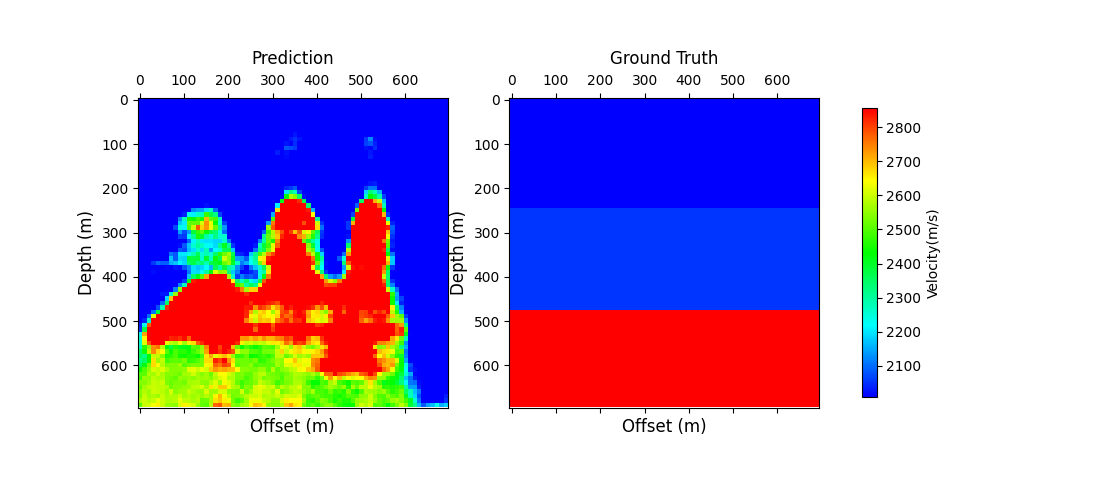

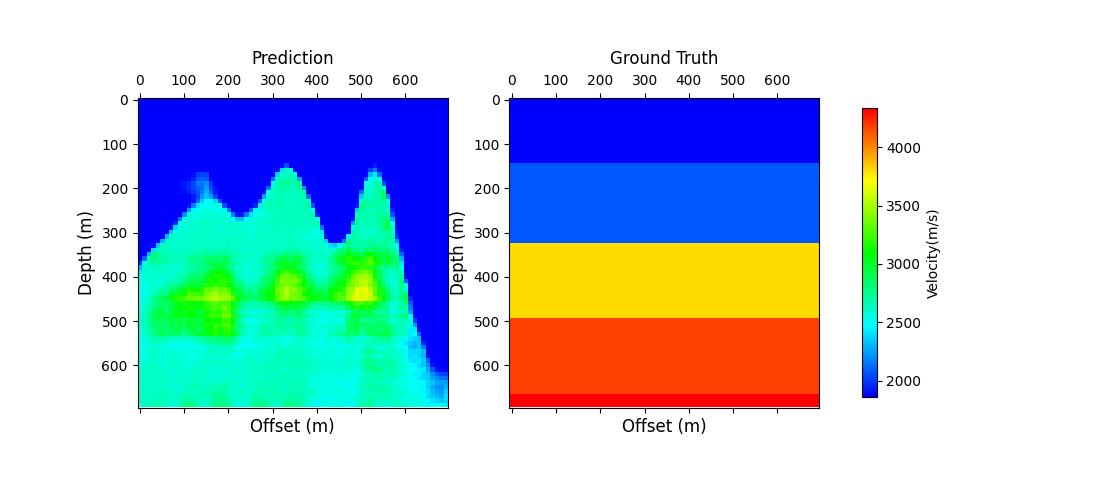

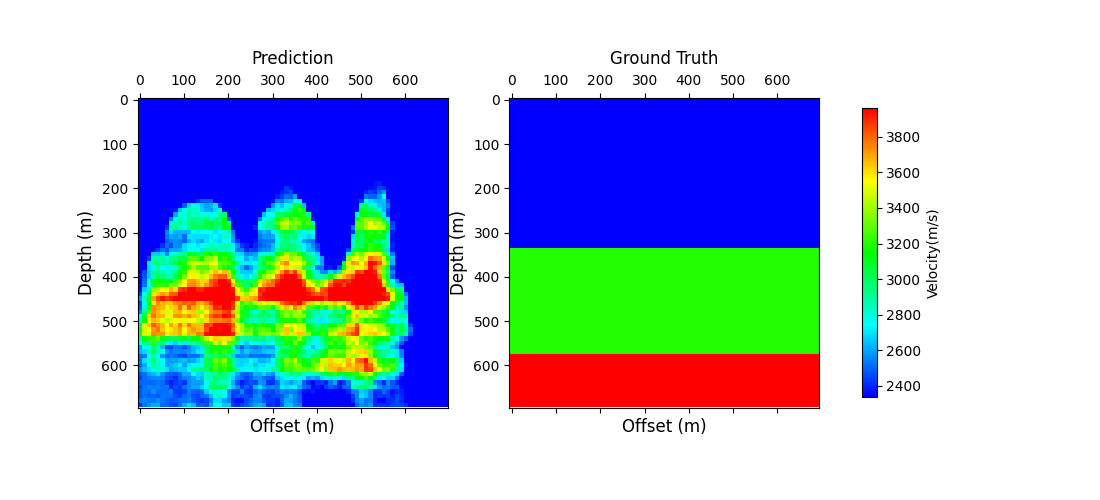

In [ ]:
!python test.py -ds flatvel-tutorial -n transfer_learning -m InversionNet -v tutorial_val.txt -r checkpoint.pth --vis -vb 2 -vsa 3
a=Image('./Invnet_models/transfer_learning/visualization/V_0_0.png', width = 600, height = 300)
b=Image('./Invnet_models/transfer_learning/visualization/V_0_1.png', width = 600, height = 300)
c=Image('./Invnet_models/transfer_learning/visualization/V_0_2.png', width = 600, height = 300)
display(a,b,c)

## Test with your own machine
Due to the limitation of Colab, we only provide small dataset for the tutorial. The full dataset can be reached through our website:
[![Website](https://img.shields.io/website?up_color=red&up_message=OpenFWI%20dataset&url=https%3A%2F%2Fopenfwi-lanl.github.io%2Fdocs%2Fdata.html)](https://openfwi-lanl.github.io/docs/data.html#vel)

<left width="100%" style="padding:10px"><img src="https://openfwi-lanl.github.io/assets/img/gallery.jpg" width="600px"></left>


### Environment setup on your own machine

As we are using colab, you do not have to do anything currently. However later, if you would like to run experiments on your own machine, our codes mainly use the following packages:
- pytorch v1.7.1
- torchvisionv0.8.2
- scikit learn
- numpy
- matplotlib

In [ ]:
# Read the original test.py file
with open('test.py', 'r') as f:
    test_py_content = f.read()

# Modify the line with torch.load in the main function
modified_test_py_content = test_py_content.replace(
    'checkpoint = torch.load(args.resume, map_location=\'cpu\')',
    'checkpoint = torch.load(args.resume, map_location=\'cpu\', weights_only=False)'
)

# Write the modified content back to test.py
with open('test.py', 'w') as f:
    f.write(modified_test_py_content)

print("Modified test.py to include weights_only=False in torch.load.")

Modified test.py to include weights_only=False in torch.load.
